# Project: No-Show Appointmensts

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset I have selected is [No-Show Appointmensts](https://www.kaggle.com/datasets/joniarroba/noshowappointments) from [Kaggle](https://www.kaggle.com/)
>
>This dataset collects information from **100k** medical appointments in **Brazil** and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row
>
>- 01 - PatientId: Identification of a patient
>
>- 02 - AppointmentID: Identification of each appointment
>
>- 03 - Gender: 'M' for Male or 'F' for Female
>
>- 04 - ScheduledDay: tells us on what day the patient set up their appointment, this is before appointment of course
>
>- 05 - AppointmentDay: The day someone called or registered the appointment
>
>- 06 - Age: How old is the patient in years
>
>- 07 - Neighbourhood: Where the appointment takes place or indicates the location of the hospital
>
>- 08 - Scholarship: indicates whether or not the patient is enrolled in Brasilian welfare program [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) (zero for not enrolled and 1 for enrolled)
>
>- 09 - Hipertension: True or False
>
>- 10 - Diabetes: True or False
>
>- 11 - Alcoholism: True or False
>
>- 12 - Handcap: True or False
>
>- 13 - SMS_received: 1 or more messages sent to the patient.
>
>- 14 - No-show: True or False (**Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.**)
>

At the end, I will ask and answer some quaestions:
<ul>
<li><a href="#q1">1- What are the general statistical results for whole columns?</a></li>

<li><a href="#q2">2- How far does the gender affect the attending of the appointment?</a></li>

<li><a href="#q3">3- Is there any relationship between age and the attending the appointment?</a></li>

<li><a href="#q4">4- Is the enrollment in Brasilian welfare program have an effect on attending the appointment?</a></li>
</ul>

In [201]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

 **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

1- load csv file to a Pandas DataFrame using *resd_csv* function

2- show the first 5 rows by *head*

3- show the number of columns and rows by *shape*

>- 110527 rows and 14 columns
>

4- show overall information by *info*
>- There isn't any NaN values, This is good but there may be unlogic values or undesired columns
>
>- Also some column dtypes need some change
>

5- show sum of all NaN values by *isnull*
>- zero NaN values
>

6- check for duplicates by *duplicated*
>- zero duplicated rows
>

### General Properties

In [202]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [203]:
df.shape

(110527, 14)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [205]:
df.isnull().sum().sum()

0

In [206]:
df['AppointmentID'].duplicated().sum()

0

### Data Cleaning
<ul>
<li><a href="#change_names">1- Change cloumns' names to lowercase, splitted by _ and correct spilling</a></li>
<li><a href="#correct_dtypes">2- Correct dtypes of columns</a></li>
<li><a href="#check">3- Check whole information by *info*</a></li>
<li><a href="#data_overview">4- Data Overview (show overall numbers about data in each column) by *describe*, *value_counts*</a></li>
<li><a href="#delete_row">5- Delete row including (age = -1)</a></li>
<li><a href="#edit_handicap">6- Edit values of handicap > 1 to equal 1</a></li>
<li><a href="#check_duplicate">7- check for duplicates</a></li>    
<li><a href="#delete_col">8- Delete some columns according to my insight</a></li>
<li><a href="#save_clean">9- Save a clean CSV</a></li>
<li><a href="#import_clean">10- Import the clean CSV and show the first 5 rows by *head*</a></li>

</ul>



<a id='change_names'></a>

In [207]:
# Change names of columns to be lowercase, Split any two word by _, correct names of two columns to hypertension and handicap 
df.columns = df.columns.str.lower()
df.rename(columns={'patientid':'patient_id',
                  'appointmentid': 'appointment_id',
                  'scheduledday': 'schedule_day',
                  'appointmentday': 'appointment_day',
                   'hipertension': 'hypertension',
                   'handcap': 'handicap',
                  'no-show':'no_show'}, inplace=True)
df.head(1)

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id='correct_dtypes'></a>

In [208]:
# Change type of PatientId Dtype from float to int to trim the digits then to string as this is more logic
df['patient_id'] = df['patient_id'].apply(int)
df['patient_id'] = df['patient_id'].apply(str)

In [209]:
# Change type of AppointmentID from int to str as as this is more logic (same as PatientId)
df['appointment_id'] = df['appointment_id'].apply(str)

In [210]:
# Change type of ScheduledDay and AppointmentDay to datetime for more control
df['schedule_day'] = pd.to_datetime(df['schedule_day']).dt.date
df['appointment_day'] = pd.to_datetime(df['appointment_day']).dt.date

<a id='check'></a>

In [211]:
# This to show the change done to dtypes of some columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   patient_id       110527 non-null  object
 1   appointment_id   110527 non-null  object
 2   gender           110527 non-null  object
 3   schedule_day     110527 non-null  object
 4   appointment_day  110527 non-null  object
 5   age              110527 non-null  int64 
 6   neighbourhood    110527 non-null  object
 7   scholarship      110527 non-null  int64 
 8   hypertension     110527 non-null  int64 
 9   diabetes         110527 non-null  int64 
 10  alcoholism       110527 non-null  int64 
 11  handicap         110527 non-null  int64 
 12  sms_received     110527 non-null  int64 
 13  no_show          110527 non-null  object
dtypes: int64(7), object(7)
memory usage: 11.8+ MB


<a id='data_overview'></a>
#### Data Overview (This section is to check whether there are any unlogic or misleading value or not)

In [212]:
# Describe the statisical results for numerical data
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [213]:
# show some little number about Gender
df['gender'].value_counts()

F    71840
M    38687
Name: gender, dtype: int64

In [214]:
# show some little number about Schedule Day
df['schedule_day'].value_counts()

2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
              ... 
2016-04-16       1
2016-01-28       1
2015-11-10       1
2016-03-19       1
2016-03-05       1
Name: schedule_day, Length: 111, dtype: int64

In [215]:
# show some little number about Appointment Day
df['appointment_day'].value_counts()

2016-06-06    4692
2016-05-16    4613
2016-05-09    4520
2016-05-30    4514
2016-06-08    4479
2016-05-11    4474
2016-06-01    4464
2016-06-07    4416
2016-05-12    4394
2016-05-02    4376
2016-05-18    4373
2016-05-17    4372
2016-06-02    4310
2016-05-10    4308
2016-05-31    4279
2016-05-05    4273
2016-05-19    4270
2016-05-03    4256
2016-05-04    4168
2016-06-03    4090
2016-05-24    4009
2016-05-13    3987
2016-05-25    3909
2016-05-06    3879
2016-05-20    3828
2016-04-29    3235
2016-05-14      39
Name: appointment_day, dtype: int64

In [216]:
# show some little number about Neighbourhood
df['neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighbourhood, Length: 81, dtype: int64

In [217]:
# Show some little numbers about attendence No == Attend Appointment , Yes == Not Attend Appointment
df['no_show'].value_counts()

No     88208
Yes    22319
Name: no_show, dtype: int64

<a id='delete_row'></a>

In [218]:
# I have noticed that the minimum value of age is -1 and this is unlogic so
# I will serach for row of age = min and delete this row
df[df['age'] == df['age'].min()]

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,465943158731293,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [219]:
row_to_delete_index = df[df['age'] == df['age'].min()].index[0]
row_to_delete_index

99832

In [220]:
df.drop(index=row_to_delete_index, inplace=True)

In [221]:
df.shape

(110526, 14)

<a id='edit_handicap'></a>

In [222]:
# check how many handicap values > 1 and set these values to 1 
df[df['handicap'] == df['handicap'].max()]

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
91820,9251878146849,5789549,M,2016-06-08,2016-06-08,15,DA PENHA,0,0,0,0,4,0,No
98538,497246337172194,5760621,M,2016-06-01,2016-06-03,19,SÃO PEDRO,0,0,0,0,4,0,No
104268,758189466958349,5697136,F,2016-05-13,2016-06-02,9,ITARARÉ,0,0,0,0,4,1,Yes


So, I found that there are 3 rows of handicap equal 4 but This is unlogic so I will make every value of 4 to be 1

In [223]:
df['handicap'].replace({4:1,3:1,2:1}, inplace=True)

In [224]:
df['handicap'][df['handicap'] > 1].count()

0

<a id= 'check_duplicate'></a>

In [225]:
# check again for duplicates and now we for whole DataFrame and for appointment_id column also
df['appointment_id'].duplicated().sum()

0

In [226]:
df.duplicated().sum()

0

<a id='delete_col'></a>

In [227]:
# Delete columns of patient_id, appointment_id, schedule_day, appointment_day as I will not include them in my insight
df.drop(columns=['patient_id', 'appointment_id', 'schedule_day', 'appointment_day'], inplace=True)

In [228]:
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='save_clean'></a>

In [229]:
# Save a clean CSV 
df.to_csv('clean_no_show_appointment_data.csv', index=False)

<a id='import_clean'></a>

In [230]:
# Import the clean CSV and show the first 5 rows by *head*
df = pd.read_csv('clean_no_show_appointment_data.csv')
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [231]:
df.shape

(110526, 10)

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110526 entries, 0 to 110525
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   gender         110526 non-null  object
 1   age            110526 non-null  int64 
 2   neighbourhood  110526 non-null  object
 3   scholarship    110526 non-null  int64 
 4   hypertension   110526 non-null  int64 
 5   diabetes       110526 non-null  int64 
 6   alcoholism     110526 non-null  int64 
 7   handicap       110526 non-null  int64 
 8   sms_received   110526 non-null  int64 
 9   no_show        110526 non-null  object
dtypes: int64(7), object(3)
memory usage: 8.4+ MB


In [233]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.020276,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.140943,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


These statistical results from numerical columns is good

In [234]:
def No_show_percent():
    """
    This function simply detect the number of patients attending and missing the medical appointment 
    and print the results as message
    
    Parameters:
    
    """
    
    sum_of_appointments = df['no_show'].count()
    
    sum_of_attend = df['no_show'][df['no_show'] == 'No'].count()
    attend_percent = sum_of_attend * 100 / sum_of_appointments
    
    sum_of_miss = df['no_show'][df['no_show'] == 'Yes'].count()
    miss_percent = sum_of_miss * 100 / sum_of_appointments
    
    No_show_percent_message = 'The Appointment Attending Percent is {}% with number of {}\nThe Missing Appointment Percent is {}% with sum of {}'.format(round(attend_percent, 2), sum_of_attend, round(miss_percent, 2), sum_of_miss)
    print(No_show_percent_message)
No_show_percent()

The Appointment Attending Percent is 79.81% with number of 88207
The Missing Appointment Percent is 20.19% with sum of 22319


In [235]:
def percentage(any_column):
    """
    This function simply detect the number of patients having and not having one of these six columns 
    [scholarship, hypertension, diabetes, alcoholism, handicap, sms_received]
    and print the results as message
    
    Parameters:
    any column of the above 6 columns
    """
    any_column = str(any_column)
    sum_of_appointments = df[any_column].count()
    
    sum_of_have = df[any_column][df[any_column] == 1].count()
    have_percent = sum_of_have * 100 / sum_of_appointments
    
    sum_of_not_have = df[any_column][df[any_column] == 0].count()
    not_have_percent = sum_of_not_have * 100 / sum_of_appointments
    
    any_column_percent_message = 'The Patients Percent having {} is {}% with number of {}\nThe Patients Percent not having {} is {}% with sum of {}'.format(any_column,round(have_percent, 2), sum_of_have, any_column, round(not_have_percent, 2), sum_of_not_have)
    print(any_column_percent_message)

In [236]:
percentage('scholarship')

The Patients Percent having scholarship is 9.83% with number of 10861
The Patients Percent not having scholarship is 90.17% with sum of 99665


In [237]:
percentage('hypertension')

The Patients Percent having hypertension is 19.72% with number of 21801
The Patients Percent not having hypertension is 80.28% with sum of 88725


In [238]:
percentage('diabetes')

The Patients Percent having diabetes is 7.19% with number of 7943
The Patients Percent not having diabetes is 92.81% with sum of 102583


In [239]:
percentage('alcoholism')

The Patients Percent having alcoholism is 3.04% with number of 3360
The Patients Percent not having alcoholism is 96.96% with sum of 107166


In [240]:
percentage('handicap')

The Patients Percent having handicap is 2.03% with number of 2241
The Patients Percent not having handicap is 97.97% with sum of 108285


In [241]:
percentage('sms_received')

The Patients Percent having sms_received is 32.1% with number of 35482
The Patients Percent not having sms_received is 67.9% with sum of 75044


<a id='eda'></a>
## Exploratory Data Analysis

<a id='q1'></a>
### 1- What are the general statistical results for whole columns?

In [242]:
df.head(1)

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


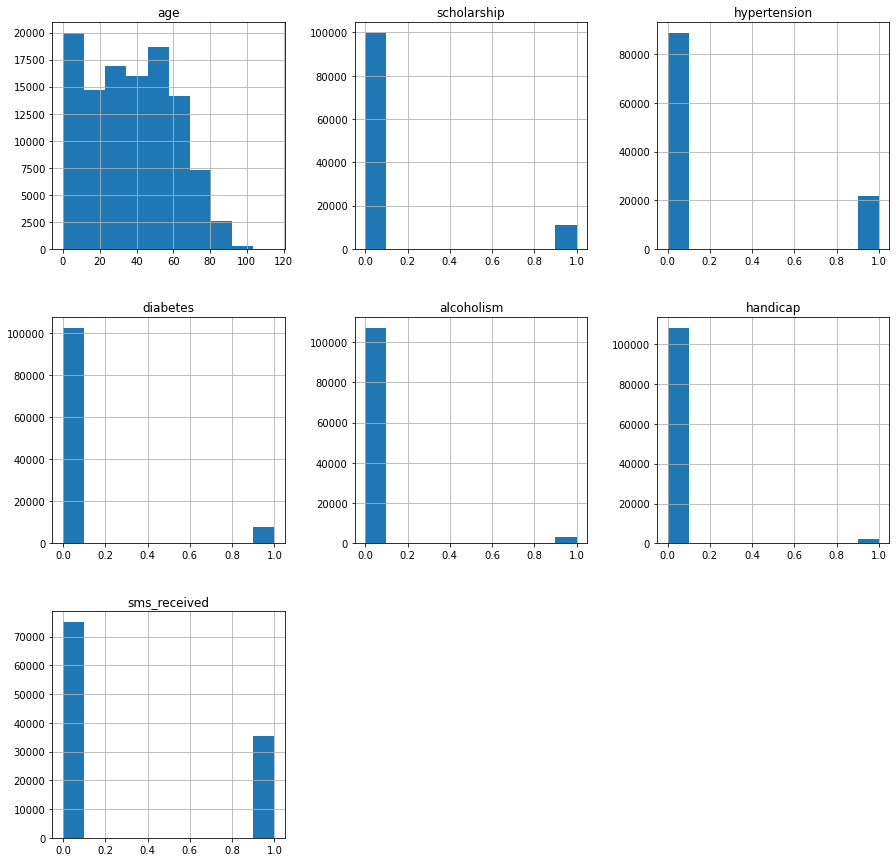

In [243]:
# Histogram of whole numerical columns
df.hist(figsize=(15,15));

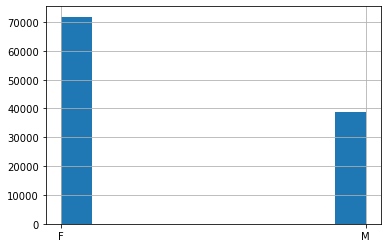

In [244]:
df['gender'].hist();

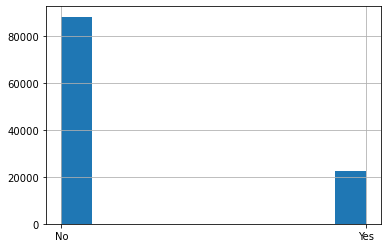

In [245]:
df['no_show'].hist();

In [246]:
df['neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighbourhood, Length: 81, dtype: int64

In [247]:
df['neighbourhood'].count()

110526

In [248]:
neighbourhood_percent_df = df['neighbourhood'].value_counts() * 100 / df['neighbourhood'].count()
neighbourhood_percent_df

JARDIM CAMBURI                 6.982068
MARIA ORTIZ                    5.252158
RESISTÊNCIA                    4.009011
JARDIM DA PENHA                3.507772
ITARARÉ                        3.179342
                                 ...   
ILHA DO BOI                    0.031667
ILHA DO FRADE                  0.009048
AEROPORTO                      0.007238
ILHAS OCEÂNICAS DE TRINDADE    0.001810
PARQUE INDUSTRIAL              0.000905
Name: neighbourhood, Length: 81, dtype: float64

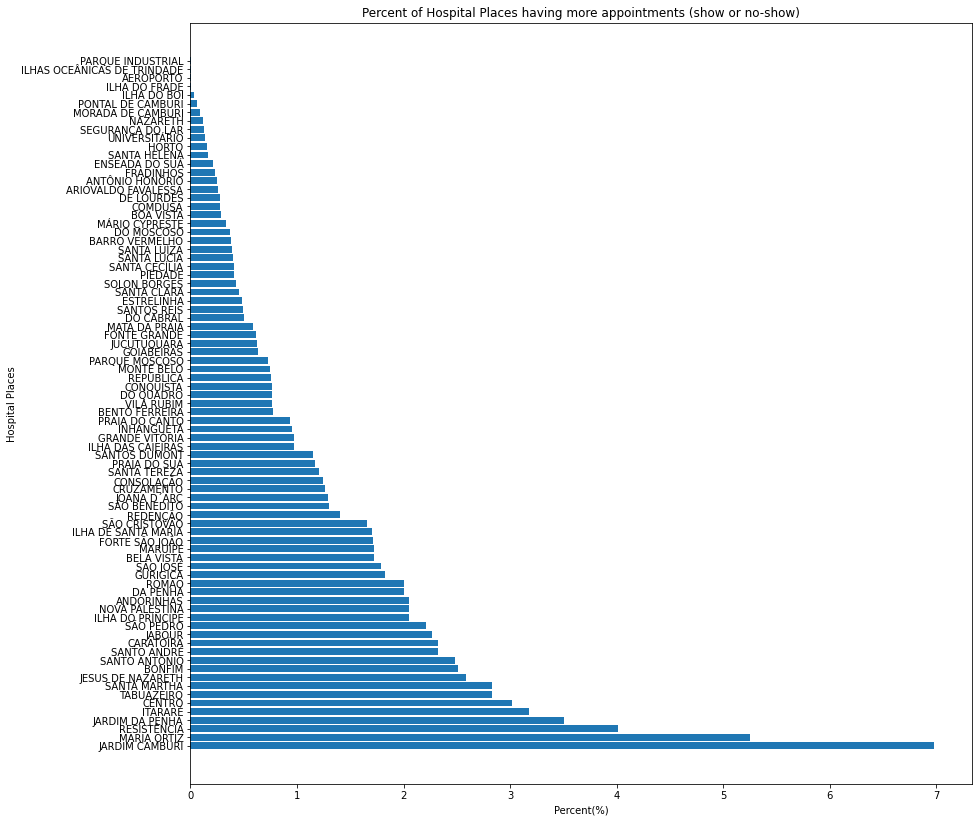

In [249]:
plt.subplots(figsize=(14,14));
plt.barh(neighbourhood_percent_df.index, neighbourhood_percent_df.values);
plt.title('Percent of Hospital Places having more appointments (show or no-show)');
plt.xlabel('Percent(%)');
plt.ylabel('Hospital Places');

We can sum up these histograms to say:
>-The majority of patients are below 60 years and number of patients decreases after 60
>
>-The majority of patients are not included in Brasilian welfare program (Bolsa Família)
>
>-The majority of patients are not suffering from hypertension, diabetes, alcoholism nor handicap
>
>-The higher percent of patients did not recieve a SMS to inform them about the appointment
>
>-The higher percent of patients is females 
>
>-The higher percent of patients had appointments in 'JARDIM CAMBURI' with (\~7% of whole appointments) then 'MARIA ORTIZ' with (\~5.25% of whole appointments)
>

<a id='q2'></a>
### 2- How far does the gender affect the attending of the appointment?
Here, I will discuss the no_show column as the dependent variable against gender as an independent variable

In [250]:
gender_no_show_df = df.groupby('gender')['no_show'].value_counts()
gender_no_show_df

gender  no_show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: no_show, dtype: int64

In [251]:
female_no_show_df = df.groupby('gender')['no_show'].value_counts().loc['F']
female_no_show_df

no_show
No     57245
Yes    14594
Name: no_show, dtype: int64

In [252]:
male_no_show_df = df.groupby('gender')['no_show'].value_counts().loc['M']
male_no_show_df

no_show
No     30962
Yes     7725
Name: no_show, dtype: int64

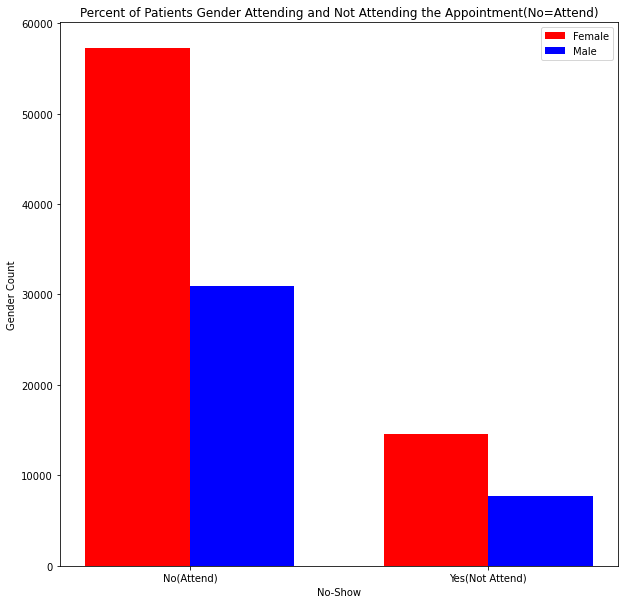

In [253]:
labels = ['No(Attend)', 'Yes(Not Attend)']
x = np.arange(len(labels))
width = 0.35

bar_value_1 = female_no_show_df 
bar_value_2 = male_no_show_df

plt.subplots(figsize=(10,10));
plt.bar(x-width/2, bar_value_1, width, color='red', label='Female');
plt.bar(x+width/2, bar_value_2, width, color='blue', label='Male');

plt.title('Percent of Patients Gender Attending and Not Attending the Appointment(No=Attend)');
plt.xlabel('No-Show');
plt.ylabel('Gender Count');
plt.xticks(x, labels);
plt.legend();

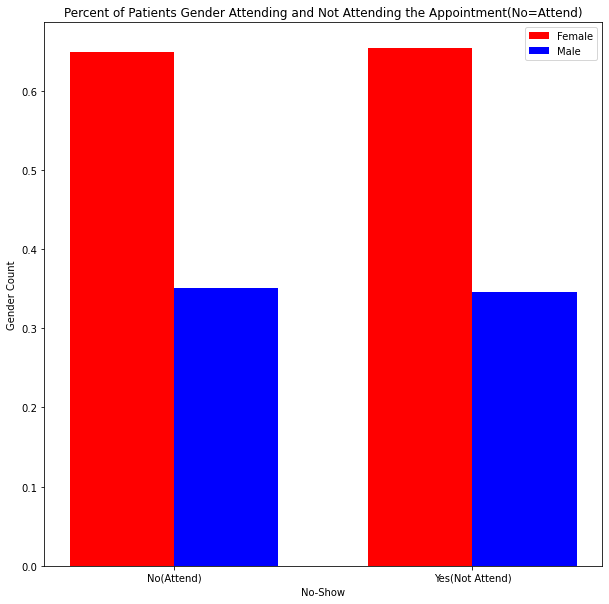

In [254]:
labels = ['No(Attend)', 'Yes(Not Attend)']
x = np.arange(len(labels))
width = 0.35

bar_value_1 = [female_no_show_df[0] / df['no_show'].value_counts()['No'],
               female_no_show_df[1] / df['no_show'].value_counts()['Yes']]
bar_value_2 = [male_no_show_df[0] / df['no_show'].value_counts()['No'],
               male_no_show_df[1] / df['no_show'].value_counts()['Yes']]

plt.subplots(figsize=(10,10));
plt.bar(x-width/2, bar_value_1, width, color='red', label='Female');
plt.bar(x+width/2, bar_value_2, width, color='blue', label='Male');

plt.title('Percent of Patients Gender Attending and Not Attending the Appointment(No=Attend)');
plt.xlabel('No-Show');
plt.ylabel('Gender Count');
plt.xticks(x, labels);
plt.legend();

We can sum up this bar plot to say:
>-The higher percent of patients are Females 
>
>-Females are the more like to attend the appointment
>
>-Females are the more like to miss the appointment also 
>

<a id='q3'></a>
### 3- Is there any relationship between age and the attending the appointment?
Here, I will discuss the no_show column as the dependent variable against age as an independent variable but I will divide the age into 5 sections (1st quarter, 2nd quarter, 3rd quarter, 4th quarter, 5th quarter) each quarter is 25 years

In [255]:
bins = [0, 25, 50, 75, 100, 125]
age_labels = ['1st quarter', '2nd quarter', '3rd quarter', '4th quarter', '5th quarter']
df['age_quarter_names'] = pd.cut(df['age'], bins, labels = age_labels)

In [256]:
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_quarter_names
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,3rd quarter
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,3rd quarter
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,3rd quarter
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1st quarter
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,3rd quarter


In [257]:
df.groupby('age_quarter_names')['no_show'].value_counts()

age_quarter_names  no_show
1st quarter        No         26881
                   Yes         8179
2nd quarter        No         28730
                   Yes         7774
3rd quarter        No         25174
                   Yes         4857
4th quarter        No          4518
                   Yes          867
5th quarter        No             4
                   Yes            3
Name: no_show, dtype: int64

In [258]:
first_quart_no_show_df = df.groupby('age_quarter_names')['no_show'].value_counts()['1st quarter']
first_quart_no_show_df

no_show
No     26881
Yes     8179
Name: no_show, dtype: int64

In [259]:
second_quart_no_show_df = df.groupby('age_quarter_names')['no_show'].value_counts()['2nd quarter']
third_quart_no_show_df = df.groupby('age_quarter_names')['no_show'].value_counts()['3rd quarter']
fourth_quart_no_show_df = df.groupby('age_quarter_names')['no_show'].value_counts()['4th quarter']
fifth_quart_no_show_df = df.groupby('age_quarter_names')['no_show'].value_counts()['5th quarter']

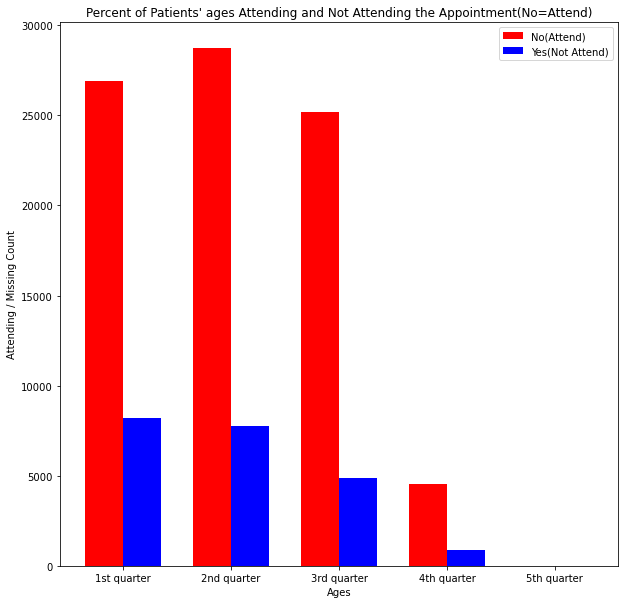

In [260]:
labels = ['1st quarter', '2nd quarter', '3rd quarter', '4th quarter', '5th quarter']
x = np.arange(len(labels))
width = 0.35

bar_value_1 = [first_quart_no_show_df['No'], second_quart_no_show_df['No'], third_quart_no_show_df['No'], fourth_quart_no_show_df['No'], fifth_quart_no_show_df['No']]
bar_value_2 = [first_quart_no_show_df['Yes'], second_quart_no_show_df['Yes'], third_quart_no_show_df['Yes'], fourth_quart_no_show_df['Yes'], fifth_quart_no_show_df['Yes']]


plt.subplots(figsize=(10,10));
plt.bar(x-width/2, bar_value_1, width, color='red', label='No(Attend)');
plt.bar(x+width/2, bar_value_2, width, color='blue', label='Yes(Not Attend)');

plt.title('Percent of Patients\' ages Attending and Not Attending the Appointment(No=Attend)');
plt.xlabel('Ages');
plt.ylabel('Attending / Missing Count');
plt.xticks(x, labels);
plt.legend();

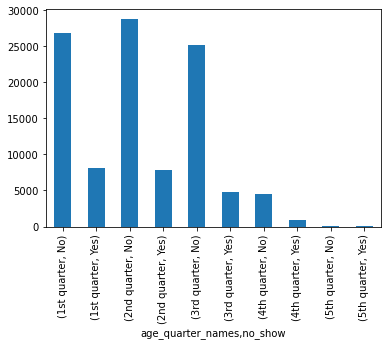

In [261]:
df.groupby('age_quarter_names')['no_show'].value_counts().plot(kind='bar');

We can sum up these 2 bars plot to say:
>-The number of Patients who attended the appointment is high in the first 75 years then became low for the following 50 years
>
>-The number of Patients who missed the appointment is high in the first 75 years then became low for the following 50 years
>
>-The number of patients above 75 years old is so little compared to whom below 75
>

<a id='q4'></a>
### 4- Is the enrollment in Brasilian welfare program have an effect on attending the appointment?
Here, I will discuss the no_show column as the dependent variable against scholarship as an independent variable

In [262]:
scholarship_no_show_df = df.groupby('scholarship')['no_show'].value_counts()
scholarship_no_show_df

scholarship  no_show
0            No         79924
             Yes        19741
1            No          8283
             Yes         2578
Name: no_show, dtype: int64

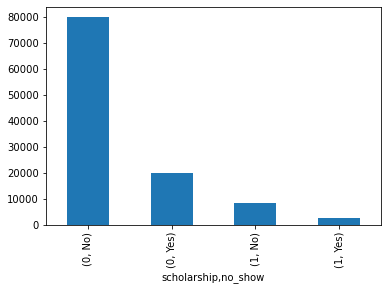

In [263]:
scholarship_no_show_df.plot(kind='bar');

In [264]:
scholarship_no_show_df.rename(index={0:'Not Enrolled', 1:'Enrolled'}, inplace=True)

In [265]:
scholarship_no_show_df

scholarship   no_show
Not Enrolled  No         79924
              Yes        19741
Enrolled      No          8283
              Yes         2578
Name: no_show, dtype: int64

In [266]:
not_enrolled_no_show_df = scholarship_no_show_df['Not Enrolled']
not_enrolled_no_show_df

no_show
No     79924
Yes    19741
Name: no_show, dtype: int64

In [267]:
enrolled_no_show_df = scholarship_no_show_df['Enrolled']
enrolled_no_show_df

no_show
No     8283
Yes    2578
Name: no_show, dtype: int64

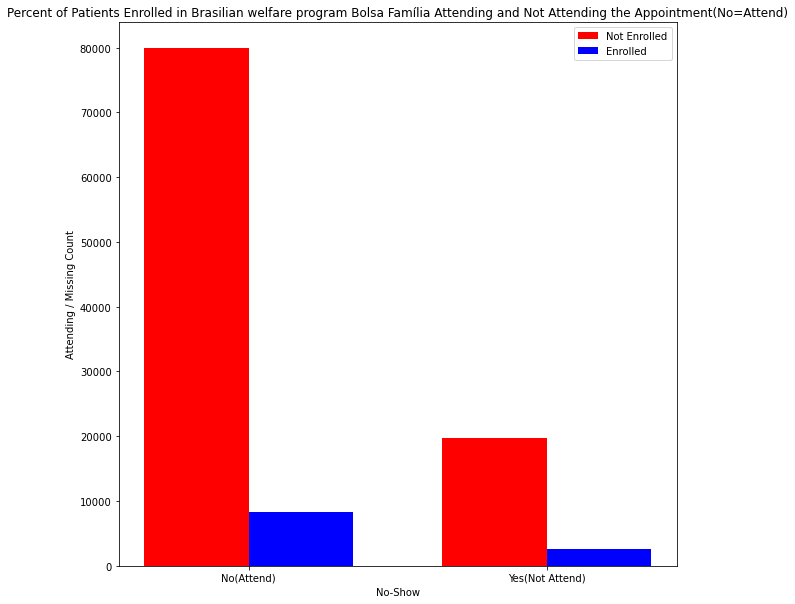

In [268]:
labels = ['No(Attend)', 'Yes(Not Attend)']
x = np.arange(len(labels))
width = 0.35

bar_value_1 = not_enrolled_no_show_df 
bar_value_2 = enrolled_no_show_df

plt.subplots(figsize=(10,10));
plt.bar(x-width/2, bar_value_1, width, color='red', label='Not Enrolled');
plt.bar(x+width/2, bar_value_2, width, color='blue', label='Enrolled');

plt.title('Percent of Patients Enrolled in Brasilian welfare program Bolsa Família Attending and Not Attending the Appointment(No=Attend)');
plt.xlabel('No-Show');
plt.ylabel('Attending / Missing Count');
plt.xticks(x, labels);
plt.legend();

We can sum up these 2 bars plot to say:
>-The number of patients who did not enroll in Brasilian welfare program and attended the appointment is larger than whom did not enroll and attended 
>
>-The number of patients who enroll in Brasilian welfare program and attended the appointment is larger than whom enrolled and attended 
>
>-The scholarship has not a impressive effect to push the patients to attend the appointment
>

### Limitations
1- There are some unlogic values such like 
    <ul>
        <li>age < 0 as I considered age = zero is a new baby</li>
        <li>handicap of value > 1 so I returned these values to be 1 </li>
    </ul>

2- Missing features that may be useful to assure what is the most feature that impacts showing to the appointment such like
    <ul>
        <li>whether the patient is employeed or not</li>
        <li>the distance from the patient location to the hospital location</li>
    </ul>


<a id='conclusions'></a>
## Conclusions
>-The majority of patients are below 60 years and number of patients decreases after 60
>
>-The majority of patients are not included in Brasilian welfare program (Bolsa Família)
>
>-The majority of patients are not suffering from hypertension, diabetes, alcoholism nor handicap
>
>-The higher percent of patients did not recieve a SMS to inform them about the appointment
>
>-The higher percent of patients is females 
>
>-The higher percent of patients had appointments in 'JARDIM CAMBURI' with (\~7% of whole appointments) then 'MARIA ORTIZ' with (\~5.25% of whole appointments)
>
>-The higher percent of patients are Females 
>
>-Females are the more like to attend the appointment
>
>-Females are the more like to miss the appointment also 
>
>-The number of Patients who attended the appointment is high in the first 75 years then became low for the following 50 years
>
>-The number of Patients who missed the appointment is high in the first 75 years then became low for the following 50 years
>
>-The number of patients above 75 years old is so little compared to whom below 75
>
>-The number of patients who did not enroll in Brasilian welfare program and attended the appointment is larger than whom did not enroll and attended 
>
>-The number of patients who enroll in Brasilian welfare program and attended the appointment is larger than whom enrolled and attended 
>
>-The scholarship has not a impressive effect to push the patients to attend the appointment
>